In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
df = pd.read_csv('taxi.csv')

In [3]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


- 'offer_gk' - id предложения
- 'weekday_key' - номер недели
- 'hour_key' - время, часы
- 'driver_gk' - id  водителя
- 'order_gk' - id заказа
- 'driver_latitude' - первая координата водителя
- 'driver_longitude' - вторая координата водителя
- 'origin_order_latitude' - первая координата клиента
- 'origin_order_longitude' - вторая координата клиента
- 'distance_km' - расстояние поездки
- 'duration_min' - длительность поездки
- 'offer_class_group' - класс поездки
- 'ride_type_desc' - тип поездки
- 'driver_response' - решение водителя, таргет-переменная

In [4]:
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [5]:
df.profile_report()

### Наблюдения:
1. distance_km 
   - есть что-то, похожее на выбросы
   - четверть значений - отрицательные
   - есть длина, равная 0
   - много подозрительный расстояний, длина которых меньше 1ого км
2. driver_latitude
   - предположительно, есть выбросы
   - есть отрицательные значения
3. driver_longitude
   - не совсем понятно, почему, но координаты водителя сильно скорреклированы (0.99)
4. driver_response
   - данные сбалансированны, половина ответов да, половина нет
5. duration_min
   - сильно скоррелированы с расстоянием поездки (0,98)
6. hour_key
   - 7% нулей, но это не проблема, заказ может быть создан в 00 часов
7. offer_class_group
   - две наиболее популярные группы, на них приходится 95,6 % всех данных
8. origin_order_latitude
   - есть выбросы
   - есть отрицательные значения
9. origin_order_longitude
   - есть выбросы
   - есть отрицательные значения
10. ride_type_desc
   - всего 4 типа, но 91% приходится на private 
11. weekday_key
   - есть нулевые дни недели, но это не проблема, так как отсчет дней с 0
12. пропущенных значений нет
13. есть решение водителя влияет больше всего расстояние и длительность поездки, координаты водителя и клиента

### Разберемся с переменной distance_km

Есть подозрение, что начиная с какого-то расстояния, водители не принимают заказы.

In [5]:
print(df.query('driver_response==1')['distance_km'].max(), 'max для 1')
print(df.query('driver_response==0')['distance_km'].max(), 'max для 0')

5215.793 max для 1
5234.2829999999985 max для 0


Максиммум для отказов и принятий заказов близки, предположение не оправдалось.
Делаем вывод, что огромные расстояния - это не выбросы, а действительно редкие, но вполне реальные заказы.

Много значений, расстояния поездки которых от 0 до 1 км или отрицательно. Проверим, может, такие заказы водители не берут.

In [6]:
print(df.query('distance_km>=0 & distance_km<1  & driver_response==1').shape, 'положительные ответы для маленьких дистанций') 
print(df.query('distance_km>=0 & distance_km<1  & driver_response==0').shape, 'отрицательные ответы для маленьких дистанций') 
print(df.query('distance_km>=0  & driver_response==1').shape, 'положительные ответы для нулевых дистанций') 
print(df.query('distance_km>=0  & driver_response==0').shape, 'отрицательные ответы для нулевых дистанций') 
print(df.query('distance_km<0  & driver_response==1').shape, 'положительные ответы для отрицательных дистанций') 
print(df.query('distance_km<0  & driver_response==0').shape, 'отрицательные ответы для отрицательных дистанций') 

(296, 14) положительные ответы для маленьких дистанций
(179, 14) отрицательные ответы для маленьких дистанций
(34814, 14) положительные ответы для нулевых дистанций
(38979, 14) отрицательные ответы для нулевых дистанций
(14434, 14) положительные ответы для отрицательных дистанций
(11773, 14) отрицательные ответы для отрицательных дистанций


Видим, что в целом водители могут взять заказ и с нулевой/отрицательной/маленькой дистанцией.
Тем не менее, нулевые и отрицательные дистанции явно надо изменить.
Мы могли бы заменить их на медиану, но она учитывает отрицательные значения.
Посчитаем медиану для значений от 0 до max.

In [7]:
dis_median=df.query('distance_km>=0')['distance_km'].median()

Добавим в данные новый столбец, в котором заменим отрицательные и нулевые дистанции медианой.

In [8]:
def new_dis(row):
    if row<=0:
        return dis_median
    else:
        return row

In [9]:
df['new_dis']=df['distance_km'].apply(lambda row: new_dis(row))

In [10]:
del df['distance_km']

### Разберемся с переменной driver_latitude

Есть отрицательные и нулевые значения, заменим их на медиану.

In [11]:
dr_lat_median=df.query('driver_latitude>0')['driver_latitude'].median()

In [12]:
def new_dr_lat(row):
    if row<=0:
        return dr_lat_median
    else:
        return row

In [13]:
df['new_dr_lat']=df['driver_latitude'].apply(lambda row: new_dr_lat(row))

In [14]:
del df['driver_latitude']

### Разберемся с переменной driver_longitude

Как мы поняли, driver_longitude скоррелирован с driver_latitude, 
тем не менее это значение нам может пригодиться для подготовки новых признаков.

In [15]:
dr_long_median=df.query('driver_longitude>0')['driver_longitude'].median()

def new_dr_long(row):
    if row<=0:
        return dr_long_median
    else:
        return row

df['new_dr_long']=df['driver_longitude'].apply(lambda row: new_dr_long(row))

In [16]:
del df['driver_longitude']

### Разберемся с переменной duration_min

Переменная скоррелированна с distance_km, так что удалим ее.

In [17]:
del df['duration_min']

### Разберемся с переменной offer_class_group

Разобьем переменную на 3 категории: Economy, Standard, Other

In [18]:
def class_grp(row):
    if row=='Economy':
        return row
    elif row=='Standard':
        return row
    else:
        return 'Other'

df['class_grp']=df['offer_class_group'].apply(lambda row: class_grp(row))

In [19]:
del df['offer_class_group']

### Разберемся с переменной origin_order_latitude

In [20]:
cl_lat_median=df.query('origin_order_latitude>0')['origin_order_latitude'].median()

def new_cl_lat(row):
    if row<=0:
        return cl_lat_median
    else:
        return row

df['new_cl_lat']=df['origin_order_latitude'].apply(lambda row: new_cl_lat(row))

del df['origin_order_latitude']

### Разберемся с переменной origin_order_longitude

In [21]:
cl_long_median=df.query('origin_order_longitude>0')['origin_order_longitude'].median()

def new_cl_long(row):
    if row<=0:
        return cl_long_median
    else:
        return row

df['new_cl_long']=df['origin_order_longitude'].apply(lambda row: new_cl_long(row))

del df['origin_order_longitude']

### Разберемся с переменной ride_type_desc


Разобьем переменную на 2 категории: private , other

In [22]:
def ride_type(row):
    if row=='private':
        return row
    else:
        return 'other'

df['ride_type']=df['ride_type_desc'].apply(lambda row: ride_type(row))

del df['ride_type_desc']

Перекодируем категориальные признаки:

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
def get_one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [25]:
col_list = ['ride_type', 'class_grp']
df = get_one_hot(df, col_list)

In [26]:
del df['ride_type']
del df['class_grp']

Еще раз посмотрим на данные:

In [27]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_response,new_dis,new_dr_lat,new_dr_long,new_cl_lat,new_cl_long,ride_type_other,ride_type_private,class_grp_Economy,class_grp_Other,class_grp_Standard
0,1105373,5,20,6080,174182,0,18.607,55.818842,37.334562,55.814567,37.355010,0,1,1,0,0
1,759733,5,14,6080,358774,1,18.802,55.805342,37.515023,55.819329,37.466398,0,1,0,0,1
2,416977,6,14,6080,866260,0,6.747,55.813978,37.347688,55.814827,37.354074,0,1,1,0,0
3,889660,2,6,6080,163522,1,18.607,55.745922,37.421748,55.743469,37.431130,0,1,1,0,0
4,1120055,4,16,6080,506710,1,12.383,55.803578,37.521602,55.812559,37.527407,0,1,1,0,0


Признаки, которые можно попробовать построить:
 - выходной/будний день
 - расстояние от водителя до клиента
 - отношение расстояния водителя до клиента к расстоянию поездки
 - коэффициент лояльности водителя
 - часы: утро, день, вечер, ночь

#### Признак: выходной или будний день

Все координаты относятся примерно к Москве, в Москве выходные - это 5 и 6ой дни (если считать от нуля).

In [28]:
def weekends(row):
    if row<=4:
        return 0
    else:
        return 1

df['weekends']=df['weekday_key'].apply(lambda row: weekends(row))


#### Признак: расстояние от водителя до клиента

In [29]:
from geopy.distance import vincenty

In [30]:
def compute_dist(coords1, coords2):
    return vincenty(coords1, coords2).kilometers

In [31]:
df['driver_to_client_dist'] = df.apply(lambda row: compute_dist(
            (row.new_cl_lat, row.new_cl_long),
            (row.new_dr_lat, row.new_dr_long)
        ), axis=1)

/home/yellow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [32]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_response,new_dis,new_dr_lat,new_dr_long,new_cl_lat,new_cl_long,ride_type_other,ride_type_private,class_grp_Economy,class_grp_Other,class_grp_Standard,weekends,driver_to_client_dist
0,1105373,5,20,6080,174182,0,18.607,55.818842,37.334562,55.814567,37.355010,0,1,1,0,0,1,1.367355
1,759733,5,14,6080,358774,1,18.802,55.805342,37.515023,55.819329,37.466398,0,1,0,0,1,1,3.423260
2,416977,6,14,6080,866260,0,6.747,55.813978,37.347688,55.814827,37.354074,0,1,1,0,0,1,0.411356
3,889660,2,6,6080,163522,1,18.607,55.745922,37.421748,55.743469,37.431130,0,1,1,0,0,0,0.649440
4,1120055,4,16,6080,506710,1,12.383,55.803578,37.521602,55.812559,37.527407,0,1,1,0,0,0,1.064116


#### Признак: отношение расстояния водителя до клиента к расстоянию поездки

In [33]:
df['distant_relation']=df.apply(lambda row: row[17]/row[6],axis=1)

In [34]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_response,new_dis,new_dr_lat,new_dr_long,new_cl_lat,new_cl_long,ride_type_other,ride_type_private,class_grp_Economy,class_grp_Other,class_grp_Standard,weekends,driver_to_client_dist,distant_relation
0,1105373,5,20,6080,174182,0,18.607,55.818842,37.334562,55.814567,37.355010,0,1,1,0,0,1,1.367355,0.073486
1,759733,5,14,6080,358774,1,18.802,55.805342,37.515023,55.819329,37.466398,0,1,0,0,1,1,3.423260,0.182069
2,416977,6,14,6080,866260,0,6.747,55.813978,37.347688,55.814827,37.354074,0,1,1,0,0,1,0.411356,0.060969
3,889660,2,6,6080,163522,1,18.607,55.745922,37.421748,55.743469,37.431130,0,1,1,0,0,0,0.649440,0.034903
4,1120055,4,16,6080,506710,1,12.383,55.803578,37.521602,55.812559,37.527407,0,1,1,0,0,0,1.064116,0.085934


In [35]:
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_response,new_dis,new_dr_lat,new_dr_long,new_cl_lat,new_cl_long,ride_type_other,ride_type_private,class_grp_Economy,class_grp_Other,class_grp_Standard,weekends,driver_to_client_dist,distant_relation
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,0.492480,23.560207,55.780864,37.546615,55.779821,37.546646,0.087930,0.912070,0.483350,0.043770,0.472880,0.347500,1.044028,0.114562
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,0.499946,39.570874,0.153739,0.156947,0.156439,0.160191,0.283194,0.283194,0.499725,0.204584,0.499266,0.476179,1.760972,0.653976
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,0.000000,0.005000,55.327636,36.984771,55.327917,36.994072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,0.000000,11.058750,55.709424,37.413497,55.708142,37.407117,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.405637,0.013498
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,0.000000,18.607000,55.773063,37.533882,55.772562,37.532547,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.656015,0.038829
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,1.000000,30.665250,55.960667,37.624113,55.962000,37.624358,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325454,0.104081
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,1.000000,5234.283000,56.174097,38.280547,56.311121,38.243608,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.579609,115.145448


Поняли, что признак не актуален, так как все водители находятся в непосредственной близости к клиентам. 

#### Признак: коэффициент лояльности водителя

Коэффициент лояльности водителя - это отношение принятых поездок к отказам

In [36]:
dr_koeff=df.groupby(['driver_gk']).sum()['driver_response']

In [37]:
def dr_koeff_func(row):
    return dr_koeff[row]

In [38]:
df['dr_loyalty']=df['driver_gk'].apply(lambda row: dr_koeff_func(row)/len(df))

In [39]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_response,new_dis,new_dr_lat,new_dr_long,new_cl_lat,new_cl_long,ride_type_other,ride_type_private,class_grp_Economy,class_grp_Other,class_grp_Standard,weekends,driver_to_client_dist,distant_relation,dr_loyalty
0,1105373,5,20,6080,174182,0,18.607,55.818842,37.334562,55.814567,37.355010,0,1,1,0,0,1,1.367355,0.073486,0.00161
1,759733,5,14,6080,358774,1,18.802,55.805342,37.515023,55.819329,37.466398,0,1,0,0,1,1,3.423260,0.182069,0.00161
2,416977,6,14,6080,866260,0,6.747,55.813978,37.347688,55.814827,37.354074,0,1,1,0,0,1,0.411356,0.060969,0.00161
3,889660,2,6,6080,163522,1,18.607,55.745922,37.421748,55.743469,37.431130,0,1,1,0,0,0,0.649440,0.034903,0.00161
4,1120055,4,16,6080,506710,1,12.383,55.803578,37.521602,55.812559,37.527407,0,1,1,0,0,0,1.064116,0.085934,0.00161


#### Признак времени: утро, день, вечер, ночь

In [40]:
def day_part(row):
    if 3<=row<9:
        return '0'
    elif 9<=row<15:
        return '1'
    elif 15<=row<21:
        return '2'
    else:
        return '3'

In [41]:
df['day_part']=df['hour_key'].apply(lambda row: day_part(row))

In [42]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_response,new_dis,new_dr_lat,new_dr_long,new_cl_lat,...,ride_type_other,ride_type_private,class_grp_Economy,class_grp_Other,class_grp_Standard,weekends,driver_to_client_dist,distant_relation,dr_loyalty,day_part
0,1105373,5,20,6080,174182,0,18.607,55.818842,37.334562,55.814567,...,0,1,1,0,0,1,1.367355,0.073486,0.00161,2
1,759733,5,14,6080,358774,1,18.802,55.805342,37.515023,55.819329,...,0,1,0,0,1,1,3.423260,0.182069,0.00161,1
2,416977,6,14,6080,866260,0,6.747,55.813978,37.347688,55.814827,...,0,1,1,0,0,1,0.411356,0.060969,0.00161,1
3,889660,2,6,6080,163522,1,18.607,55.745922,37.421748,55.743469,...,0,1,1,0,0,0,0.649440,0.034903,0.00161,0
4,1120055,4,16,6080,506710,1,12.383,55.803578,37.521602,55.812559,...,0,1,1,0,0,0,1.064116,0.085934,0.00161,2


#### Приступим к обучению модели

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
list(df)

['offer_gk',
 'weekday_key',
 'hour_key',
 'driver_gk',
 'order_gk',
 'driver_response',
 'new_dis',
 'new_dr_lat',
 'new_dr_long',
 'new_cl_lat',
 'new_cl_long',
 'ride_type_other',
 'ride_type_private',
 'class_grp_Economy',
 'class_grp_Other',
 'class_grp_Standard',
 'weekends',
 'driver_to_client_dist',
 'distant_relation',
 'dr_loyalty',
 'day_part']

In [45]:
cols=['offer_gk',
 'weekday_key',
 'hour_key',
 'driver_gk',
 'order_gk',
 'new_dis',
 'new_dr_lat',
 'new_dr_long',
 'new_cl_lat',
 'new_cl_long',
 'ride_type_other',
 'ride_type_private',
 'class_grp_Economy',
 'class_grp_Other',
 'class_grp_Standard',
 'weekends',
 'driver_to_client_dist',
 'distant_relation',
 'dr_loyalty',
 'day_part']

In [46]:
X=df[cols].values
y=df['driver_response'].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve

In [50]:
xgb = DecisionTreeClassifier()
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.77


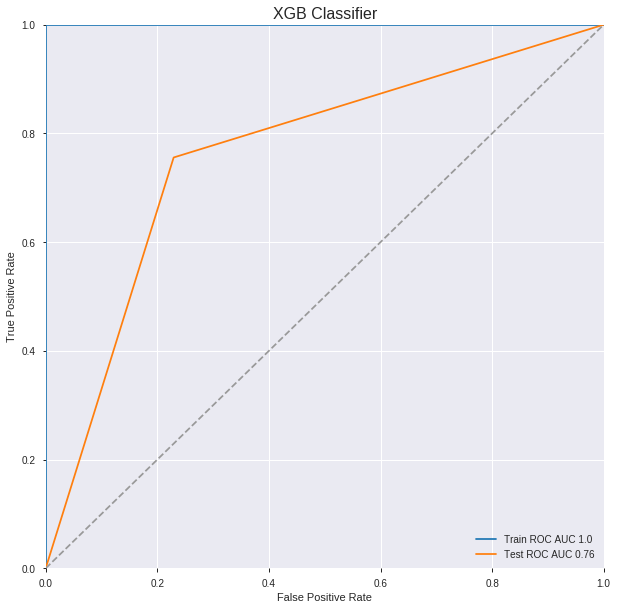

In [252]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

Удалось построить модель, которая довольно точно определяет, взял ли таксист заказ.